# mean-x-variance-PRM-data
2.9.23

Don't know if this will make it into any figures. But here I'm plotting the relationship between mean and variance across technical replicates for all peptides in a parallel reaction monitoring (PRM) experiment that Lillian gave me. Not totally sure what the provenance of this data is. Is it from the SMTG AD DIA study? 

Another idea could just be to repeat this with data that we know is from the SMTG AD DIA study, like the same peptide quants matrices we used for the DE test. At least we would know the provenance. But does this matrix have enough replicates? 

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
#pd.object.head(500) to display the first 500 rows 

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# plotting templates
sns.set(context="talk", style="ticks") 
sns.set_palette("tab10")

#### Read in, remove the 'ChrLib' samples

In [2]:
# read in
prm = pd.read_csv("../../../../data/maccoss-data/PRM_peptide_info_100percent.csv")

# remove ChrLib group
to_remove = prm["Analyzer"] == "ChrLib"
prm = prm[~to_remove]
prm = prm.reset_index(drop=True)

#### Get means and variances across replicates

In [3]:
means = []
varz = []
analyzers = []

# do we know that this 1,2,3 pattern repeats throughout the entire dataframe? 
for i in range(0, len(prm.index), 3):
    sub_df = prm[i:i+3]
    analyzer = list(sub_df["Analyzer"])[0]
    zero_count = np.count_nonzero(list(sub_df["Total Area"] == 0))
    
    if zero_count == 0:
        mean = np.mean(sub_df["Total Area"])
        var = np.var(sub_df["Total Area"])
        
        means.append(mean)
        varz.append(var)
        analyzers.append(analyzer)

#### Init mean-x-variance dataframe for plotting

In [4]:
mean_x_var = pd.DataFrame(columns=["mean", "variance", "analyzer"])
mean_x_var["mean"] = means
mean_x_var["variance"] = varz
mean_x_var["analyzer"] = analyzers
mean_x_var

,mean,variance,analyzer
0,2.675507e+05,2.537747e+07,"LIT, Rapid"
1,2.344903e+05,5.701263e+07,"LIT, Turbo"
2,4.096968e+07,1.136387e+12,"OT, DIA"
3,2.675507e+05,2.537747e+07,"LIT, Rapid"
4,2.344903e+05,5.701263e+07,"LIT, Turbo"
...,...,...,...
44804,3.166667e+03,4.213936e+05,"LIT, Turbo"
44805,3.488000e+03,2.669067e+04,"LIT, Rapid"
44806,3.166667e+03,4.213936e+05,"LIT, Turbo"
44807,3.488000e+03,2.669067e+04,"LIT, Rapid"


#### Plot, log

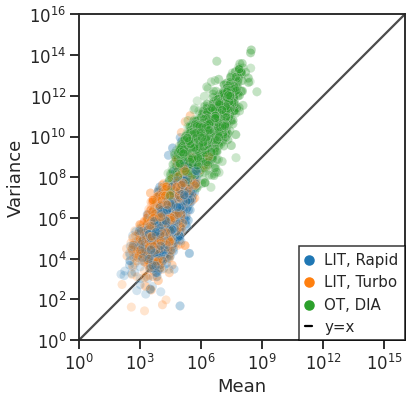

In [5]:
plt.figure(figsize=(6,6))
sns.scatterplot(
    data=mean_x_var, x="mean", y="variance", 
    alpha=0.05, edgecolors="none", hue="analyzer")

plt.minorticks_off()

plt.xlabel("Mean")
plt.ylabel("Variance")

plt.xscale("log")
plt.yscale("log")

ax = plt.gca()

ax.plot([0,1e20], [0,1e20], color="black", zorder=0, alpha=0.7, label='y=x')
ax.set_aspect('equal', 'box')

plt.xlim([1,1e16])
plt.ylim([1,1e16])

leg = plt.legend(
        frameon=True, 
        fancybox=False, 
        loc="lower right", 
        edgecolor="black",
        handlelength=0.5,
        borderaxespad=0,
        fontsize="small",
)

# set legendhandle alphas to 1
for lh in leg.legendHandles: 
    lh.set_alpha(1)

plt.tight_layout()
plt.show()
#plt.savefig('lillian-dia-meanvar.png', dpi=250, bbox_inches='tight')

***

## Look at results from a single analyzer
Maybe it makes sense to include one of these conditions in my figure? 

#### Subset, just a single analyzer

In [15]:
mean_x_var_sub = mean_x_var[mean_x_var["analyzer"] == "LIT, Rapid"]
mean_x_var_sub = mean_x_var_sub.reset_index(drop=True)

#### Plot

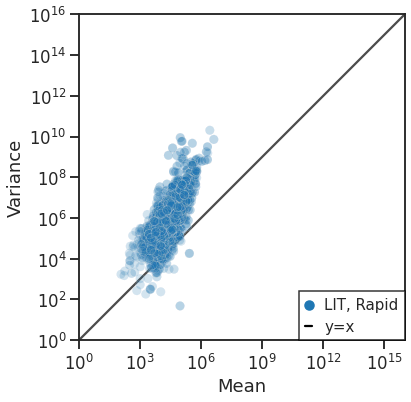

In [17]:
plt.figure(figsize=(6,6))
sns.scatterplot(
    data=mean_x_var_sub, x="mean", y="variance", 
    alpha=0.05, edgecolors="none", hue="analyzer")

plt.minorticks_off()

plt.xlabel("Mean")
plt.ylabel("Variance")

plt.xscale("log")
plt.yscale("log")

ax = plt.gca()

ax.plot([0,1e20], [0,1e20], color="black", zorder=0, alpha=0.7, label='y=x')
ax.set_aspect('equal', 'box')

plt.xlim([1,1e16])
plt.ylim([1,1e16])

leg = plt.legend(
        frameon=True, 
        fancybox=False, 
        loc="lower right", 
        edgecolor="black",
        handlelength=0.5,
        borderaxespad=0,
        fontsize="small",
)

# set legendhandle alphas to 1
for lh in leg.legendHandles: 
    lh.set_alpha(1)

plt.tight_layout()
plt.show()

#### What about with a different analyzer?

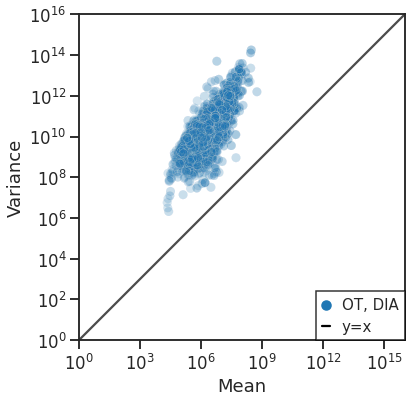

In [19]:
# subset
mean_x_var_sub = mean_x_var[mean_x_var["analyzer"] == "OT, DIA"]
mean_x_var_sub = mean_x_var_sub.reset_index(drop=True)

# plot
plt.figure(figsize=(6,6))
sns.scatterplot(
    data=mean_x_var_sub, x="mean", y="variance", 
    alpha=0.05, edgecolors="none", hue="analyzer")

plt.minorticks_off()

plt.xlabel("Mean")
plt.ylabel("Variance")

plt.xscale("log")
plt.yscale("log")

ax = plt.gca()

ax.plot([0,1e20], [0,1e20], color="black", zorder=0, alpha=0.7, label='y=x')
ax.set_aspect('equal', 'box')

plt.xlim([1,1e16])
plt.ylim([1,1e16])

leg = plt.legend(
        frameon=True, 
        fancybox=False, 
        loc="lower right", 
        edgecolor="black",
        handlelength=0.5,
        borderaxespad=0,
        fontsize="small",
)

# set legendhandle alphas to 1
for lh in leg.legendHandles: 
    lh.set_alpha(1)

plt.tight_layout()
plt.show()
#plt.savefig('lillian-dia-meanvar.png', dpi=250, bbox_inches='tight')